# Estudo do tempo de corrida por km e do gênero de um maratonista 📚

---


## Análise a partir da Maratona de Boston 2023 🏃


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as patches
import seaborn as sns
plt.style.use('ggplot')

In [8]:
# leitura do arquivo

uri = "./boston_marathon_2023.csv"
maratona = pd.read_csv(uri)

In [9]:
#@title INformações da maratonininhaaaaaaaaaaaaaaa
#@markdown assim tambem
maratona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26598 entries, 0 to 26597
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age_group           26598 non-null  object 
 1   place_overall       26598 non-null  int64  
 2   place_gender        26598 non-null  int64  
 3   place_division      26598 non-null  int64  
 4   name                26598 non-null  object 
 5   team                26598 non-null  object 
 6   bib_number          26598 non-null  object 
 7   half_time           26526 non-null  object 
 8   finish_net          26598 non-null  object 
 9   finish_gun          26598 non-null  object 
 10  gender              26598 non-null  object 
 11  half_time_sec       26526 non-null  float64
 12  finish_net_sec      26598 non-null  int64  
 13  finish_gun_sec      26598 non-null  int64  
 14  finish_net_minutes  26598 non-null  float64
dtypes: float64(2), int64(5), object(8)
memory usage: 3.0+

## Arrumando estrutura do dataset 📊

In [10]:
# verificar duplicações
maratona.duplicated().any()

False

In [ ]:
# renomeando colunas

maratona.columns = ["divisao_faixa", "posicao_geral", "posicao_genero", "posicao_faixa", "nome", "equipe", "numero_peito", "tempo_meia_maratona", "tempo_liquido_maratona", "tempo_bruto_maratona", "genero", "tempo_meia_maratona_segundos", "tempo_liquido_maratona_segundos", "tempo_bruto_maratona_segundos", "tempo_liquido_maratona_minutos"]
maratona.head()

In [ ]:
# pace

maratona['pace'] = maratona['tempo_liquido_maratona_minutos'] / 42
maratona.head()

In [13]:
# selecionando somente campos por gênero

homens = maratona[maratona['genero'] == 'M']
mulheres = maratona[maratona['genero'] == 'W']


## Análise do Pace e Gênero 📊
- O gênero pode influenciar no resultado da maratona?
-


In [ ]:
# média de tempo líquido de conclusão de prova em minutos

## para todos
ml_todos = maratona['tempo_liquido_maratona_minutos'].mean()

## para homens
ml_homens = homens['tempo_liquido_maratona_minutos'].mean()

## para mulheres
ml_mulheres = mulheres['tempo_liquido_maratona_minutos'].mean()

print(f"Média Tempo Geral: {ml_todos}")
print(f"Média Tempo Homens: {ml_homens}")
print(f"Média Tempo Mulheres: {ml_mulheres}")



In [ ]:
# mostrando a média do Pace

## para todos
mp_todos = maratona['pace'].mean()

## para homens
mp_homens = homens['pace'].mean()

## para mulheres
mp_mulheres = mulheres['pace'].mean()

print(f"Média Pace Geral: {mp_todos}")
print(f"Média Pace Homens: {mp_homens}")
print(f"Média Pace Mulheres: {mp_mulheres}")

In [44]:
# média do pace por faixa etária

## para homens
mpf_homens = homens.groupby('divisao_faixa')['pace'].mean().reset_index()

## para mulheres
mpf_mulheres = mulheres.groupby('divisao_faixa')['pace'].mean().reset_index()

## homens e mulheres
mpf_todos = maratona.groupby('divisao_faixa')['pace'].mean().reset_index()



print(mpf_homens)
print(mpf_mulheres)
print(mpf_todos)


  divisao_faixa      pace
0         18-39  4.678720
1         40-44  4.833377
2         45-49  5.006103
3         50-54  5.269526
4         55-59  5.435386
5         60-64  5.709755
6         65-69  6.022541
7         70-74  6.432884
8         75-79  7.055151
9           80+  7.092989
  divisao_faixa      pace
0         18-39  5.426327
1         40-44  5.493871
2         45-49  5.615978
3         50-54  5.823973
4         55-59  6.030443
5         60-64  6.164204
6         65-69  6.478595
7         70-74  6.985721
8         75-79  7.056310
9           80+  7.283333
  divisao_faixa      pace
0         18-39  5.037818
1         40-44  5.134520
2         45-49  5.278441
3         50-54  5.474871
4         55-59  5.652182
5         60-64  5.856056
6         65-69  6.153434
7         70-74  6.557524
8         75-79  7.055347
9           80+  7.169127


In [30]:

# dados do pace

maratona['pace'].describe


<bound method NDFrame.describe of 0        2.997619
1        3.001587
2        3.002381
3        3.048016
4        3.061508
           ...   
26593    7.828571
26594    8.109921
26595    8.166270
26596    7.240476
26597    7.326190
Name: pace, Length: 26598, dtype: float64>

In [17]:
# desvio padrão do pace geral

maratona['pace'].std

<bound method NDFrame._add_numeric_operations.<locals>.std of 0        2.997619
1        3.001587
2        3.002381
3        3.048016
4        3.061508
           ...   
26593    7.828571
26594    8.109921
26595    8.166270
26596    7.240476
26597    7.326190
Name: pace, Length: 26598, dtype: float64>

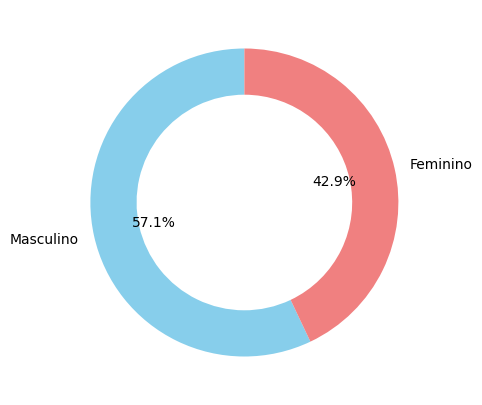

In [19]:
#@title Relação de Gêneros
df = maratona['genero'].value_counts()

# Plotar gráfico de pizza
df.plot(kind='pie', autopct='%1.1f%%', labels=['Masculino','Feminino'],  startangle=90, figsize=(5, 5), colors=['skyblue', 'lightcoral'], wedgeprops=dict(width=0.3))

#plt.title("Distribuição de Gêneros")
plt.ylabel("")  # remove o rótulo do eixo y
plt.show()

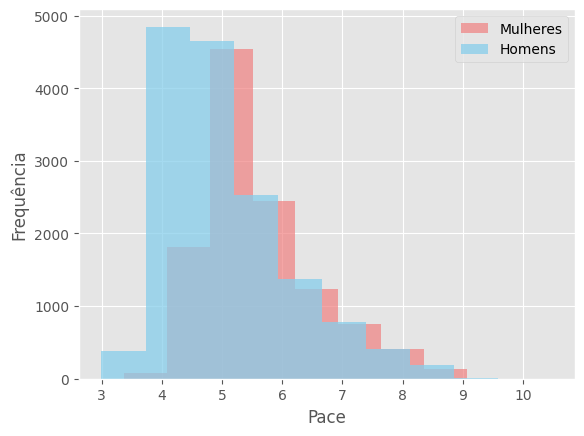

In [20]:
# histograma de paces por gênero

plt.hist(mulheres['pace'], alpha=0.7, label='Mulheres', color='lightcoral')
plt.hist(homens['pace'], alpha=0.75, label='Homens',color='skyblue')
plt.xlabel('Pace', )
plt.ylabel('Frequência')
plt.legend()
plt.show()

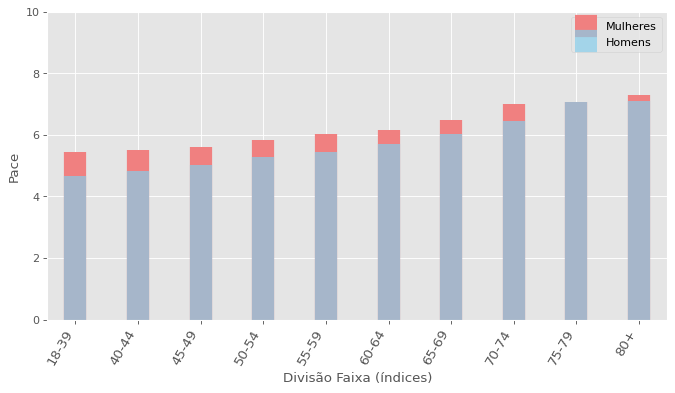

In [37]:
# pace médio for faixa etária e gênero

##  Criar a figura e o eixo
fig, ax = plt.subplots(figsize=(10, 5), facecolor='white', dpi=80)

# Adicionar as barras verticais representando a média de pace para mulheres
ax.vlines(x=mpf_mulheres.index, ymin=0, ymax=mpf_mulheres['pace'], color='lightcoral', alpha=1, linewidth=20, label='Mulheres')

##  Configurar título, rótulos dos eixos e limites do eixo y
# ax.set_title('Média de Pace por Faixa Etária e por Gênero', fontdict={'size': 22})

plt.xticks(mpf_homens.index, mpf_homens['divisao_faixa'], rotation=60, horizontalalignment='right', fontsize=12)

##  Adicionar as barras verticais representando a média de pace
ax.vlines(x=mpf_homens.index, ymin=0, ymax=mpf_homens['pace'], color='skyblue', alpha=0.7, linewidth=20, label='Homens')

# Configurar título, rótulos dos eixos e limites do eixo y
# ax.set_title('Média de Pace por Faixa Etária e por Gênero', fontdict={'size': 22})

ax.set(ylabel='Pace', ylim=(0, 10))
ax.set(xlabel='Divisão Faixa (índices)')

# Adicionar a legenda
plt.legend()

# Exibir o gráfico
plt.show()

# Plot 📊

In [ ]:
# mostrando o desvio padrão para tempo de conclusão da prova em minutos

## para todos
dp_todos = maratona['tempo_liquido_maratona_minutos'].std()

## para homens
dp_homens = homens['tempo_liquido_maratona_minutos'].std()

## para mulheres
dp_mulheres = mulheres['tempo_liquido_maratona_minutos'].std()

print(f"Desvio Padrão Geral: {dp_todos}")
print(f"Desvio Padrão Homens: {dp_homens}")
print(f"Desvio Padrão Mulheres: {dp_mulheres}")

# Análise Pace e Times
- Qual a equipe mais veloz?
- Ter uma equipe te torna mais veloz?

<ipython-input-50-181f3b0400fd>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(maratona['pace'], shade=True, color='skyblue')


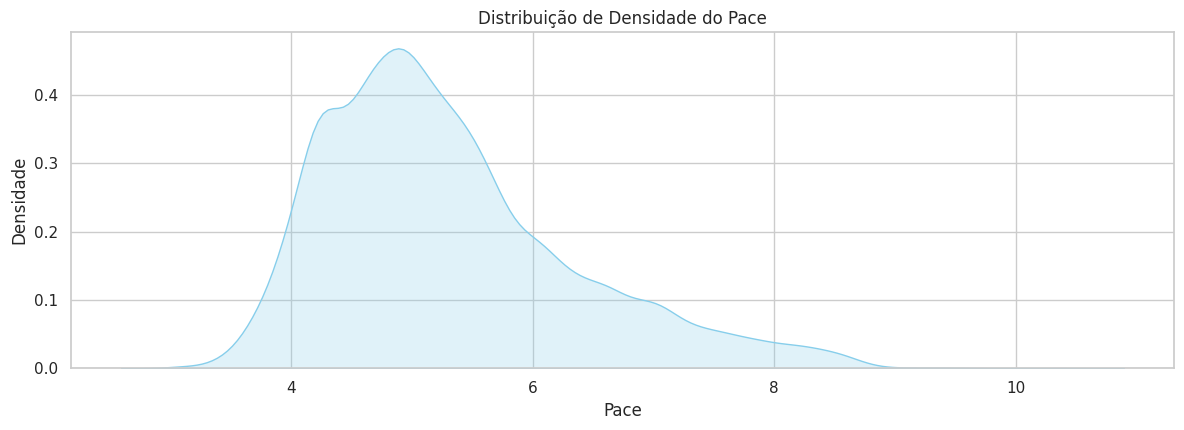

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações adicionais para melhorar a visualização
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Gráfico de densidade do Pace
plt.subplot(2, 1, 1)
sns.kdeplot(maratona['pace'], shade=True, color='skyblue')

plt.title('Distribuição de Densidade do Pace')
plt.xlabel('Pace')
plt.ylabel('Densidade')

# Boxplot do Pace

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibe os gráficos
plt.show()
